In [1]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import re
import seaborn as sns
import folium

%matplotlib inline

In this file, we want to look at where the listings are mostly located, and if there we can see any areas which tend to be more or less expensive

## Read in DataFrame and create Lat-Lon DataFrame

Firstly, read in the listings data. And we'll make sure the price column is stored as a float so we can correctly colour-code the plot later on. We'll also remove any extreme outliers so that the colour scale works properly later.

In [3]:
listings_df = pd.read_csv('./listings.csv')

# Turn price into float

listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)
listings_df = listings_df[listings_df['price'] < 800]

In [4]:
# Create lat-lon DF

lat_lon_df = listings_df[['id', 'latitude', 'longitude', 'price']].copy()
lat_lon_df.head()

,id,latitude,longitude,price
0,12147973,42.282619,-71.133068,250.0
1,3075044,42.286241,-71.134374,65.0
2,6976,42.292438,-71.135765,65.0
3,1436513,42.281106,-71.121021,75.0
4,7651065,42.284512,-71.136258,79.0


In the lat_lon_df dataframe, we have the unique ID for the listing, as well as its latitude and longitude; we've also kept the price so we can look at areas of high/low price

## Calculate Standardised Price and use this for Colour Mapping

Here we standardise the price above, we're going to use this for the colour mapping, as cmap requires a number between 0 and 1.

We'll also plot the data to look at how it's distributed

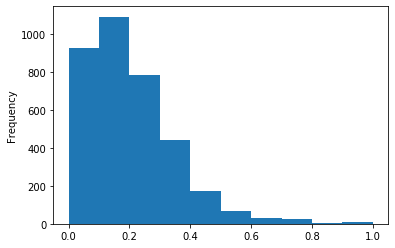

In [6]:
lat_lon_df['standardised_price'] = (lat_lon_df['price'] - lat_lon_df['price'].min()) / (lat_lon_df['price'].max() - lat_lon_df['price'].min())
lat_lon_df['standardised_price'].plot.hist()

We can see there is a right-skew to the data, and most properties are quite close in price; but nothing else major to note here.

In [7]:
#Create colour map
cmap = cm.get_cmap('gist_heat_r')

## Create Folium Map

This folium map will allow us to look at where the listings are on a map, by using the lat-lons of each residence.

In [8]:
m = folium.Map(
    location= [lat_lon_df['latitude'].mean() - 0.0175, lat_lon_df['longitude'].mean()],
    tiles= 'cartodbpositron',
    zoom_start=12
)

In [9]:
for index, row in lat_lon_df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    hex_colour = mpl.colors.rgb2hex(cmap(row['standardised_price']))
    
    folium.Circle(
        radius=1,
        location=[lat, lon],
        color=hex_colour
    ).add_to(m)

In [10]:
m

We can see that there is a much higher density of listings closer to the center of Boston. Along with this, the prices are higher than (darker colours). There are also what looks like residential areas on the outskirts, these are where there are pockets of listings in a smaller area. Then there are various properties dotted around, these seem to be much cheaper

In [9]:
m.save('Boston_Price_Map.html')